In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
data1 = np.loadtxt('/content/1.txt')
data2 = np.loadtxt('/content/2.txt')

In [ ]:
def pad(series, n):
    return np.array([series[0]] * n + list(series) + [series[-1]] * n)

In [ ]:
def autocorrelation(series, lag):
    n = len(series)
    numerator = (n - lag) * np.sum(series[:-lag] * series[lag:]) - np.sum(series[:-lag]) * np.sum(series[lag:])
    denominator = np.sqrt((n - lag) * np.sum(series[:-lag] ** 2) - np.sum(series[:-lag]) ** 2)
    denominator *= np.sqrt((n - lag) * np.sum(series[lag:] ** 2) - np.sum(series[lag:]) ** 2)
    return numerator / denominator

def ljung_box_test(residuals, lags=5):
    n = len(residuals)
    q_stat = 0

    for lag in range(1, lags + 1):
        r_k = autocorrelation(residuals, lag)
        q_stat += r_k**2 / (n - lag)

    q_stat *= n * (n + 2)

    return q_stat

def durbin_watson_test(residuals):
  numerator = np.sum(np.diff(residuals) ** 2)
  denominator = np.sum(residuals ** 2)
  return numerator / denominator

# 1. SMA

In [ ]:
def sma(series, window):
    sma_values = []
    half_window = window // 2

    series = pad(series, half_window)

    for i in range(half_window, len(series) - half_window):
        sma_values.append(np.mean(series[i-half_window:i+half_window+1]))

    return np.array(sma_values)

## 1.1 data1

In [ ]:
ws = [2 * el + 1 for el in [1, 3, 5, 7, 9]]
q_min = 1e9
w_opt = 0
for w in ws:
    sma_series = sma(data1, w)
    residuals = data1 - sma_series
    q = ljung_box_test(residuals, lags=5)
    if q < q_min:
        q_min = q
        w_opt = w

In [ ]:
sma_series = sma(data1, w_opt)

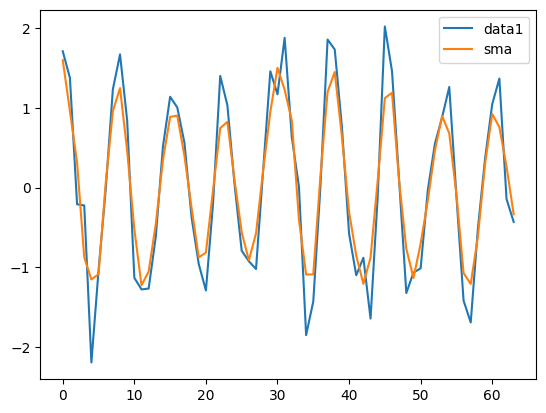

In [ ]:
plt.plot(data1, label='data1')
plt.plot(sma_series, label='sma')
plt.legend()

In [ ]:
dt = durbin_watson_test(data1 - sma_series) # 1.567, 1.629
print(dt) if 0 <= dt <= 2 else print(4 - dt)

1.6674464614793472


$\tilde{d} = 1.667 > 1.629$

автокорреляция отсутствует

## 1.2 data2

In [ ]:
ws = [2 * el + 1 for el in [1, 3, 5, 7, 9]]
q_min = 1e9
w_opt = 0
for w in ws:
    sma_series = sma(data2, w)
    residuals = data1 - sma_series
    q = ljung_box_test(residuals, lags=5)
    if q < q_min:
        q_min = q
        w_opt = w

In [ ]:
sma_series = sma(data2, w_opt)

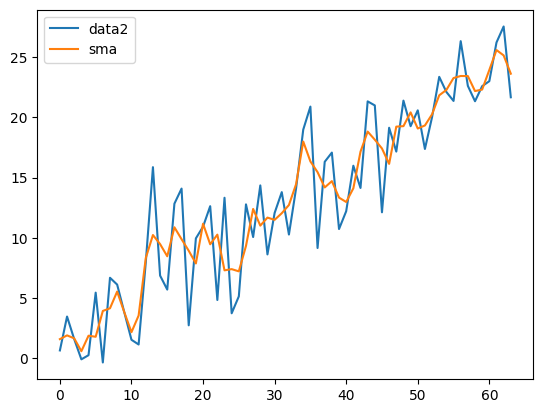

In [ ]:
plt.plot(data2, label='data2')
plt.plot(sma_series, label='sma')
plt.legend()

In [ ]:
dt2 = durbin_watson_test(data2 - sma_series)
print(dt2) if 0 <= dt2 <= 2 else print(4 - dt2)

0.8539365982811851


$\tilde{d} = 0.854 < 1.567$

Есть положительная автокорреляция

# 2. WMA

In [ ]:
def wma(series, window, epsilon=0.3):
    wma_values = []
    half_window = window // 2
    weights = np.exp(-epsilon * np.abs(np.arange(-half_window, half_window+1)))
    weights /= weights.sum()

    series = pad(series, half_window)

    for i in range(half_window, len(series) - half_window):
        wma_values.append(np.sum(weights * series[i-half_window:i+half_window+1]))

    return np.array(wma_values)

## 2.1 data1

In [ ]:
ws = [2 * el + 1 for el in [1, 3, 5, 7, 9]]
q_min = 1e9
w_opt = 0
for w in ws:
    wma_series = wma(data1, w)
    residuals = data1 - wma_series
    q = ljung_box_test(residuals, lags=5)
    if q < q_min:
        q_min = q
        w_opt = w

In [ ]:
wma_series = wma(data1, w_opt)

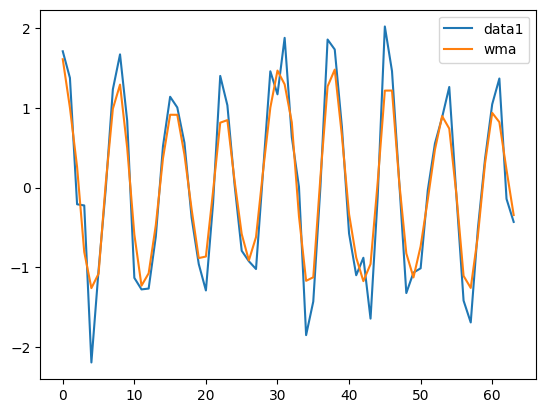

In [ ]:
plt.plot(data1, label='data1')
plt.plot(wma_series, label='wma')
plt.legend()

In [ ]:
dt3 = durbin_watson_test(data1 - wma_series)
print(dt3) if 0 <= dt3 <= 2 else print(4 - dt3) # 1.567, 1.629

1.6674464614793467


$\tilde{d} = 1.667 > 1.629$

Автокорреляция отсутсвует

## 2.2 data2

In [ ]:
ws = [2 * el + 1 for el in [1, 3, 5, 7, 9]]
q_min = 1e9
w_opt = 0
for w in ws:
    wma_series = wma(data2, w)
    residuals = data2 - wma_series
    q = ljung_box_test(residuals, lags=5)
    if q < q_min:
        q_min = q
        w_opt = w

In [ ]:
wma_series = wma(data2, w_opt)

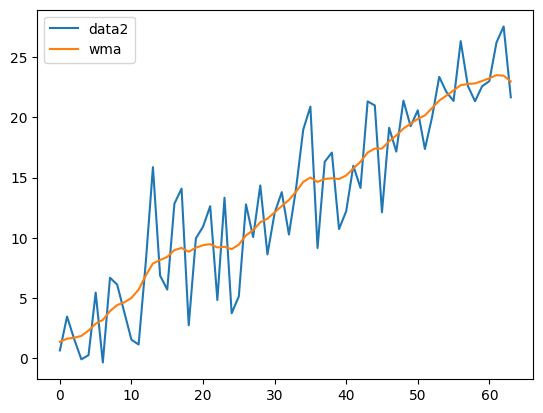

In [ ]:
plt.plot(data2, label='data2')
plt.plot(wma_series, label='wma')
plt.legend()

In [ ]:
dt4 = durbin_watson_test(data2 - wma_series)
print(dt4) if 0 <= dt4 <= 2 else print(4 - dt4) # 1.567, 1.629

1.6316659879758437


$\tilde{d} = 1.632 > 1.629$

Автокорреляция отсутствует

# 3. EMA

In [ ]:
def ema(series, alpha):
    ema_values = [series[0]]

    for i in range(1, len(series)):
        ema_values.append(alpha * series[i] + (1 - alpha) * ema_values[i - 1])

    return np.array(ema_values)

## 3.1 data1

In [ ]:
alphas = np.arange(0.1, 1, 0.1)
q_min = 1e9
a_opt = 0
for a in alphas:
    ema_series = ema(data1, a)
    residuals = data1 - ema_series
    q = ljung_box_test(residuals, lags=5)
    if q < q_min:
        q_min = q
        a_opt = a

In [ ]:
ema_series = ema(data1, a_opt)

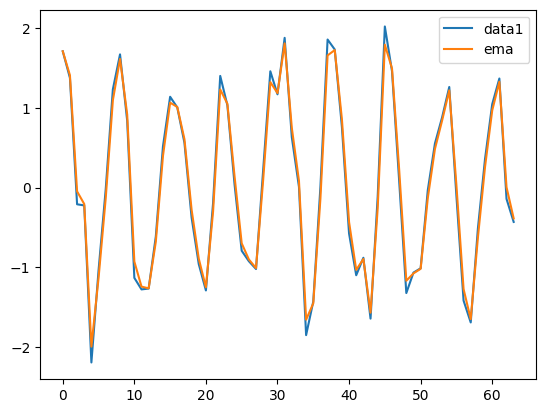

In [ ]:
plt.plot(data1, label='data1')
plt.plot(ema_series, label='ema')
plt.legend()

In [ ]:
dt5 = durbin_watson_test(data1 - ema_series)
print(dt5) if 0 <= dt5 <= 2 else print(4 - dt5) # 1.567, 1.629

1.2269352556104418


$\tilde{d} = 1.227 < 1.567$

Есть положительная автокорреляция

## 3.2 data2

In [ ]:
alphas = np.arange(0.1, 1, 0.1)
q_min = 1e9
a_opt = 0
for a in alphas:
    ema_series = ema(data2, a)
    residuals = data2 - ema_series
    q = ljung_box_test(residuals, lags=5)
    if q < q_min:
        q_min = q
        a_opt = a

In [ ]:
ema_series = ema(data2, a_opt)

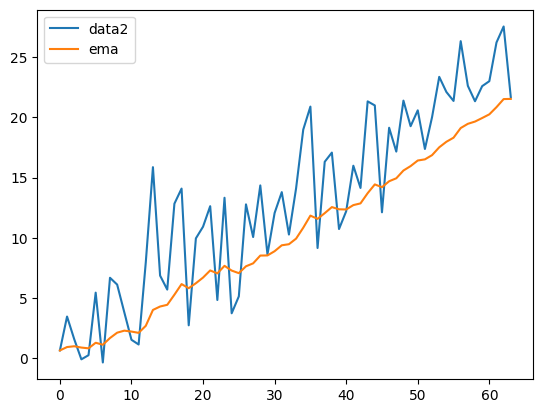

In [ ]:
plt.plot(data2, label='data2')
plt.plot(ema_series, label='ema')
plt.legend()

In [ ]:
dt6 = durbin_watson_test(data2 - ema_series)
print(dt6) if 0 <= dt6 <= 2 else print(4 - dt6) # 1.567, 1.629

1.1350723263367268


$\tilde{d} = 1.135 < 1.567$

Есть положительная автокорреляция

# 4. DEMA

In [ ]:
def dema(series, alpha, gamma):
    n = len(series)

    dema_values = [series[0]]
    trend = [series[1] - series[0]]

    for t in range(1, n):
        dema_values.append(alpha * series[t] + (1 - alpha) * (dema_values[t-1] + trend[t-1]))
        trend.append(gamma * (dema_values[t] - dema_values[t-1]) + (1 - gamma) * trend[t-1])

    return dema_values

## 4.1 data1

In [ ]:
alphas = np.arange(0.1, 1, 0.1)
gammas = np.arange(0.1, 1, 0.1)
q_min = 1e9
a_opt = 0
g_opt = 0

for a in alphas:
    for g in gammas:
        dema_series = dema(data1, a, g)
        residuals = data1 - dema_series
        q = ljung_box_test(residuals, lags=5)
        if q < q_min:
            q_min = q
            a_opt = a
            g_opt = g

In [ ]:
dema_series = dema(data1, a_opt, g_opt)

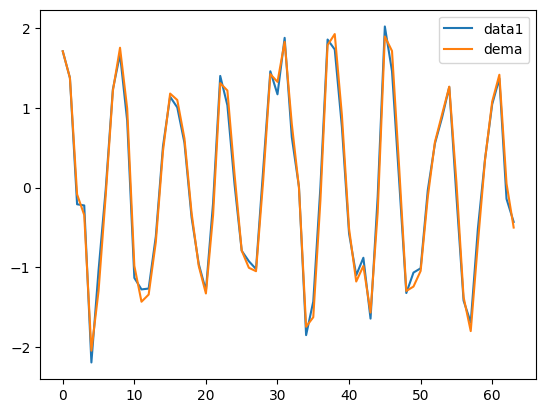

In [ ]:
plt.plot(data1, label='data1')
plt.plot(dema_series, label='dema')
plt.legend()

In [ ]:
dt7 = durbin_watson_test(data1 - dema_series)
print(dt7) if 0 <= dt7 <= 2 else print(4 - dt7) # 1.567, 1.629

1.772071456436437


$\tilde{d} = 1.772 > 1.629$

Автокорреляция отсутствует

## 4.2 data2

In [ ]:
alphas = np.arange(0.1, 1, 0.1)
gammas = np.arange(0.1, 1, 0.1)
q_min = 1e9
a_opt = 0
g_opt = 0

for a in alphas:
    for g in gammas:
        dema_series = dema(data2, a, g)
        residuals = data2 - dema_series
        q = ljung_box_test(residuals, lags=5)
        if q < q_min:
            q_min = q
            a_opt = a
            g_opt = g

In [ ]:
dema_series = dema(data2, a_opt, g_opt)

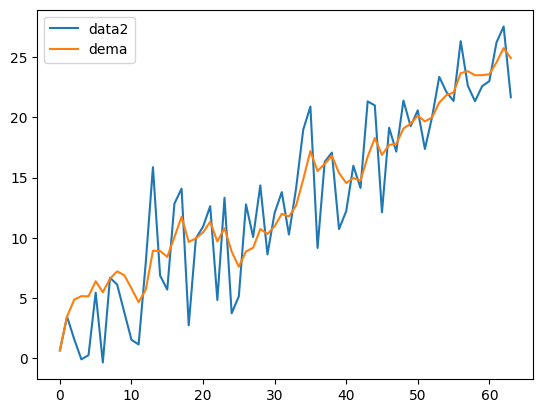

In [ ]:
plt.plot(data2, label='data2')
plt.plot(dema_series, label='dema')
plt.legend()

In [ ]:
dt8 = durbin_watson_test(data2 - dema_series)
print(dt8) if 0 <= dt8 <= 2 else print(4 - dt8) # 1.567, 1.629

1.9128850246841838


$\tilde{d}= 1.913 > 1.629$

Автокорреляция отсутствует